# **데이터 불러오기**

In [1]:
import pandas as pd
import numpy as np

In [2]:
import requests
import json

# 1. URL에서 파일 다운로드
url = 'https://github.com/wesm/pydata-book/blob/3rd-edition/datasets/bitly_usagov/example.txt?raw=true'
response = requests.get(url)

with open('example.txt', 'wb') as file:
    file.write(response.content)

# 2. 다운로드한 파일 읽기
with open('example.txt', 'r') as file:
    records = [json.loads(line) for line in file]

# 첫 번째 레코드 출력
print(records[0])

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11', 'c': 'US', 'nk': 1, 'tz': 'America/New_York', 'gr': 'MA', 'g': 'A6qOVH', 'h': 'wfLQtf', 'l': 'orofrog', 'al': 'en-US,en;q=0.8', 'hh': '1.usa.gov', 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf', 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991', 't': 1331923247, 'hc': 1331822918, 'cy': 'Danvers', 'll': [42.576698, -70.954903]}


# 표준시간대 구해보기

In [3]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]

time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

# 비어있는 필드 확인

In [4]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x]+=1
        else:
            counts[x]=1
    return counts

In [5]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x]+=1
    return counts

In [6]:
counts = get_counts(time_zones)

counts["America/New_York"]

1251

In [7]:
len(time_zones)

3440

In [8]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [9]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [10]:
from collections import Counter

counts = Counter(time_zones)

counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [11]:
frame = pd.DataFrame(records)

In [12]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [13]:
frame['tz'].head()

,tz
0,America/New_York
1,America/Denver
2,America/New_York
3,America/Sao_Paulo
4,America/New_York


In [14]:
frame['tz'].value_counts()

,count
tz,
America/New_York,1251
,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191
...,...
America/Costa_Rica,1
Africa/Lusaka,1
Africa/Johannesburg,1


In [15]:
clean_tz = frame['tz'].fillna('missing')

clean_tz[clean_tz==""] = "Unknown"

tz_counts = clean_tz.value_counts()

tz_counts.head()

,count
tz,
America/New_York,1251
Unknown,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191


<Axes: ylabel='tz'>

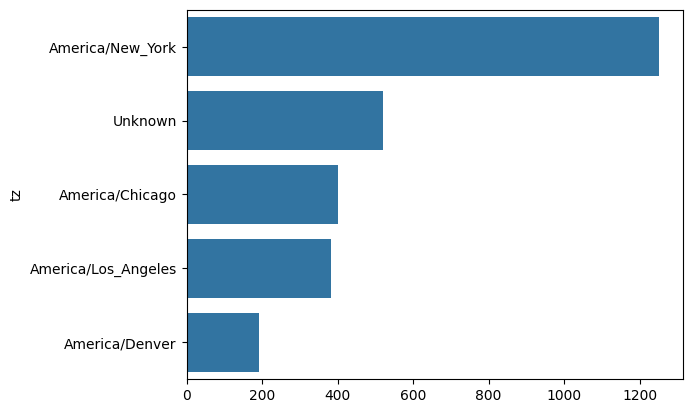

In [16]:
import seaborn as sns

subset = tz_counts.head()

sns.barplot(y=subset.index, x=subset.to_numpy())

In [17]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [18]:
result = pd.Series([x.split()[0] for x in frame["a"].dropna()])

In [19]:
result.head()

,0
0,Mozilla/5.0
1,GoogleMaps/RochesterNY
2,Mozilla/4.0
3,Mozilla/5.0
4,Mozilla/5.0


In [20]:
cframe = frame[frame["a"].notna()].copy()

In [21]:
cframe["os"] = np.where(cframe["a"].str.contains("Windows"), "Windows", "Not Windows")

cframe["os"].head(5)

,os
0,Windows
1,Not Windows
2,Windows
3,Not Windows
4,Windows


In [22]:
by_tz_os = cframe.groupby(["tz", "os"])

In [23]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [24]:
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [25]:
indexer = agg_counts.sum("columns").argsort()

In [26]:
indexer.values[:10]

array([ 8,  9, 11, 14, 87, 86, 21, 20, 56, 57])

In [27]:
cnt_subset = agg_counts.take(indexer[-10:])

cnt_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [28]:
agg_counts.sum(axis="columns").nlargest(10)

,0
tz,
America/New_York,1251.0
,521.0
America/Chicago,400.0
America/Los_Angeles,382.0
America/Denver,191.0
Europe/London,74.0
Asia/Tokyo,37.0
Pacific/Honolulu,36.0
Europe/Madrid,35.0


In [29]:
cnt_subset = cnt_subset.stack()
cnt_subset

tz                   os         
America/Sao_Paulo    Not Windows     13.0
                     Windows         20.0
Europe/Madrid        Not Windows     16.0
                     Windows         19.0
Pacific/Honolulu     Not Windows      0.0
                     Windows         36.0
Asia/Tokyo           Not Windows      2.0
                     Windows         35.0
Europe/London        Not Windows     43.0
                     Windows         31.0
America/Denver       Not Windows    132.0
                     Windows         59.0
America/Los_Angeles  Not Windows    130.0
                     Windows        252.0
America/Chicago      Not Windows    115.0
                     Windows        285.0
                     Not Windows    245.0
                     Windows        276.0
America/New_York     Not Windows    339.0
                     Windows        912.0
dtype: float64

In [30]:
cnt_subset.name = "total"
cnt_subset

tz                   os         
America/Sao_Paulo    Not Windows     13.0
                     Windows         20.0
Europe/Madrid        Not Windows     16.0
                     Windows         19.0
Pacific/Honolulu     Not Windows      0.0
                     Windows         36.0
Asia/Tokyo           Not Windows      2.0
                     Windows         35.0
Europe/London        Not Windows     43.0
                     Windows         31.0
America/Denver       Not Windows    132.0
                     Windows         59.0
America/Los_Angeles  Not Windows    130.0
                     Windows        252.0
America/Chicago      Not Windows    115.0
                     Windows        285.0
                     Not Windows    245.0
                     Windows        276.0
America/New_York     Not Windows    339.0
                     Windows        912.0
Name: total, dtype: float64

In [31]:
cnt_subset = cnt_subset.reset_index()

cnt_subset

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<Axes: xlabel='total', ylabel='tz'>

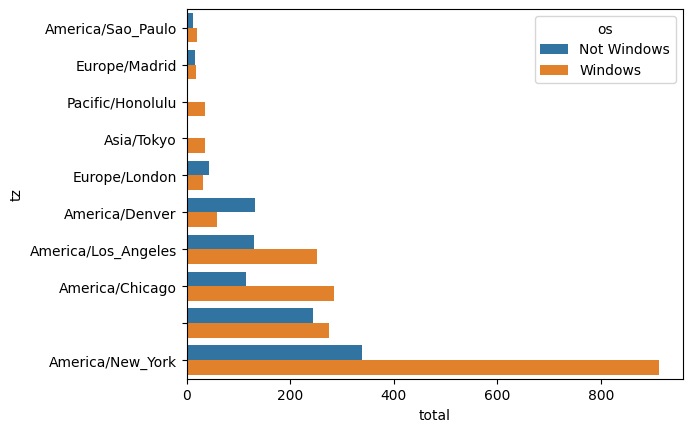

In [32]:
sns.barplot(x="total", y="tz", hue="os", data=cnt_subset)

In [33]:
def norm_data(group):
    group["normed_total"] = group["total"]/group["total"].sum()
    return group

results = cnt_subset.groupby("tz").apply(norm_data)

<Axes: xlabel='normed_total', ylabel='tz'>

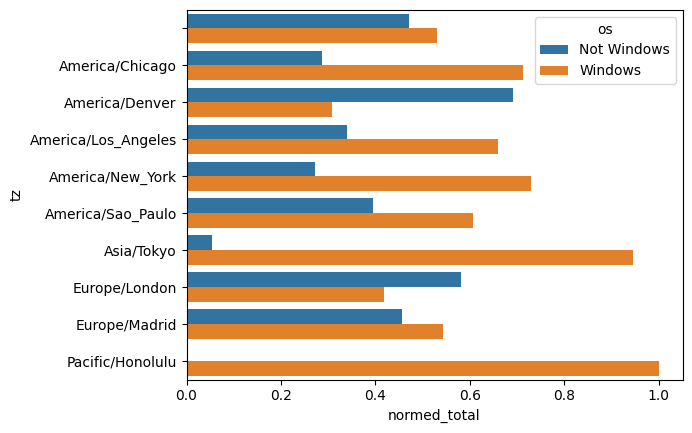

In [34]:
sns.barplot(x="normed_total", y="tz", hue="os", data=results)

In [35]:
g = cnt_subset.groupby("tz")

results2 = cnt_subset["total"]/g["total"].transform("sum")

cnt_subset["normed_total"] = results2

<Axes: xlabel='normed_total', ylabel='tz'>

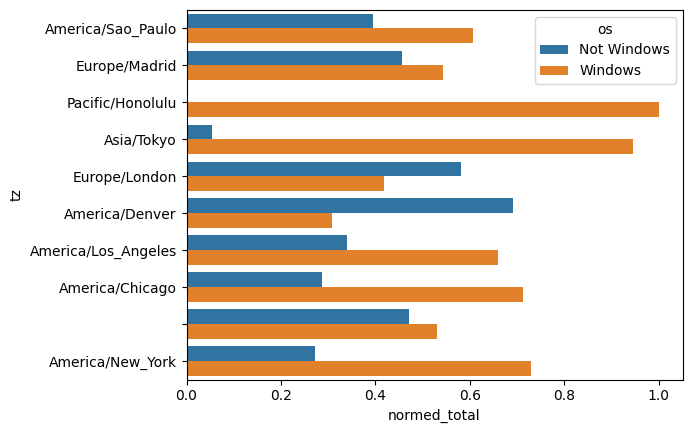

In [36]:
sns.barplot(x="normed_total", y="tz", hue="os", data=cnt_subset)

<ipython-input-72-ecddd7e8b7df>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="normed_total", y="tz", hue="os", data=data, ci="sd")


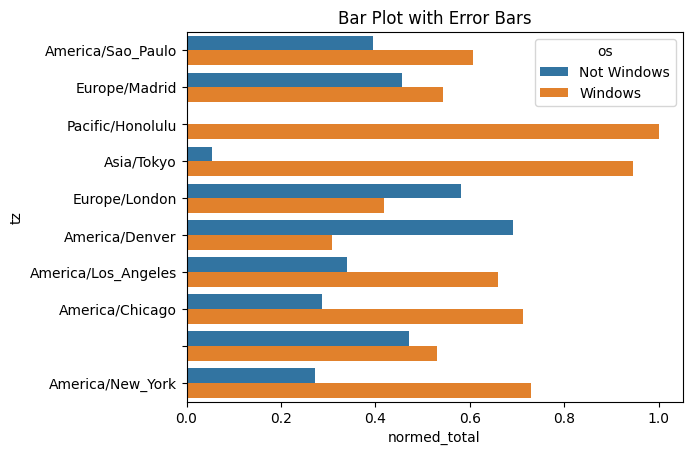

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예제 데이터
data = cnt_subset

# 에러 바 추가
sns.barplot(x="normed_total", y="tz", hue="os", data=data, ci="sd")

plt.title('Bar Plot with Error Bars')
plt.show()

In [37]:
from google.colab import drive
drive.mount('/content/drive')

!git config --global user.email 'jik970401@gmail.com'
!git config --global user.name 'jikyoung'

Mounted at /content/drive


In [42]:
cd /content/drive/MyDrive/캐글_데이콘_코드/Kaggle-Dacon/

/content/drive/MyDrive/캐글_데이콘_코드/Kaggle-Dacon


In [43]:
!git add USA_gov.ipynb

In [51]:
!git add .
!git commit -m "Commit message describing your changes"

[main f9488ce] Commit message describing your changes
 6 files changed, 5 insertions(+), 4 deletions(-)
 create mode 100644 "\b\341\204\211\341\205\265\341\206\253\341\204\213\341\205\243\341\206\250\341\204\200\341\205\242\341\204\207\341\205\241\341\206\257_\341\204\200\341\205\247\341\206\274\341\204\214\341\205\265\341\206\253\341\204\203\341\205\242\341\204\222\341\205\254.ipynb"
 create mode 100644 MovieLens.ipynb
 delete mode 100644 Test_code.ipynb


In [68]:
!git add USA_gov.ipynb
!git commit -m "Update USA_gov.ipynb"

[main f40a668] Update USA_gov.ipynb
 1 file changed, 1 insertion(+), 1 deletion(-)


In [69]:
!git pull origin main

From https://github.com/jikyoung/Kaggle-Dacon
 * branch            main       -> FETCH_HEAD
Successfully rebased and updated refs/heads/main.


In [70]:
!git push origin main

Enumerating objects: 22, done.
Counting objects: 100% (22/22), done.
Delta compression using up to 12 threads
Compressing objects: 100% (19/19), done.
Writing objects: 100% (19/19), 123.25 KiB | 1.69 MiB/s, done.
Total 19 (delta 11), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (11/11), completed with 3 local objects.
To https://github.com/jikyoung/Kaggle-Dacon.git
   b0c7c93..30df4eb  main -> main
